> ## 데이터 청년 캠퍼스 15일차 과제
> ### <b>노재혁</b>

### 1. PCA
#### 와인데이터의 전체 변수를 사용한 logistic regression 모델과 PCA로 차원을 축소한모델의 성능을 비교
- the coef_ did not converge 메세지가 나오는 경우, 모델 만들때 max_iter=10000 추가 
    - ex) LogisticRegression(solver="sag",max_iter=10000, multi_class="multinomial")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
# confusion matrix, accuracy, precision, recall
def cfmat_acc(y_test, predict):
    confusion = confusion_matrix(y_test, predict)
    accuracy = accuracy_score(y_test, predict)
    print(f'confusion matrix\n{confusion}\n')
    print(f'[정확도:{accuracy:.4f}]')

In [3]:
wine = datasets.load_wine()

x_data = pd.DataFrame(wine.data, columns=wine.feature_names)
y_data = pd.DataFrame(wine.target, columns=['target'])

In [4]:
pca = PCA(n_components=2)
pca.fit(x_data)
PCscore = pca.transform(x_data)

pca2 = PCA(n_components=4)
pca2.fit(x_data)
PCscore2 = pca2.transform(x_data)

clf = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(x_data, y_data)
clf2 = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(PCscore2, y_data)

y_pred = clf.predict(x_data)
y_pred2 = clf2.predict(PCscore2)

cfmat_acc(y_data, y_pred)
cfmat_acc(y_data, y_pred2)

C:\Users\No\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix
[[56  3  0]
 [ 2 68  1]
 [ 0  3 45]]

[정확도:0.9494]
confusion matrix
[[56  3  0]
 [ 3 67  1]
 [ 1  1 46]]

[정확도:0.9494]


C:\Users\No\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------

--------

### 2. k-means
#### 와인데이터를 군집화 하고 적절한 k를 확인

In [5]:
km = KMeans(n_clusters=3, random_state=102)
km.fit(x_data)
centers = km.cluster_centers_

In [6]:
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wineDF['target'] = wine.target
wineDF['cluster'] = km.labels_
wine_result = wineDF

In [7]:
wineDF.groupby(['target', 'cluster'])['alcohol'].count()

target  cluster
0       0          13
        1          46
1       0          20
        1           1
        2          50
2       0          29
        2          19
Name: alcohol, dtype: int64

In [8]:
# index_0 = wineDF[wineDF['cluster']==0].index
# index_1 = wineDF[wineDF['cluster']==1].index
# index_2 = wineDF[wineDF['cluster']==2].index

### 3. DBSCAN
#### 와인데이터 군집화

In [9]:
model = DBSCAN(eps=8, min_samples=4)
clst = model.fit_predict(x_data)
predict = pd.DataFrame(clst)
predict.columns = ['predict']
wine_pred = wineDF.join(predict)
wine_pred.groupby(['target', 'predict'])['alcohol'].count()

target  predict
0       -1         58
         0          1
1       -1         60
         0          3
         1          4
         2          4
2       -1         45
         0          3
Name: alcohol, dtype: int64

### 4. hierarchical
#### 와인데이터 군집화

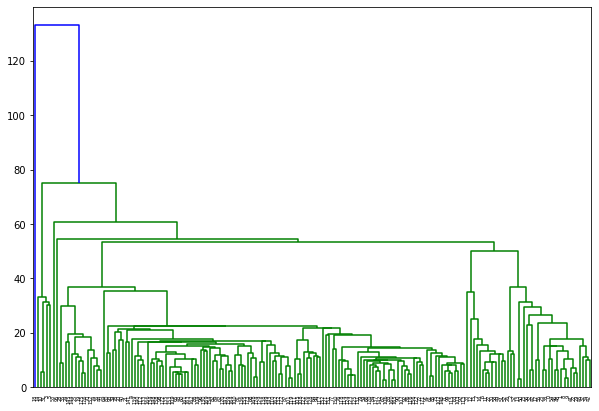

In [10]:
plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(x_data))

In [11]:
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(x_data)
label = pd.DataFrame(cluster.labels_)
label.columns = ['label']
wine_label = x_data.join(label)

[]

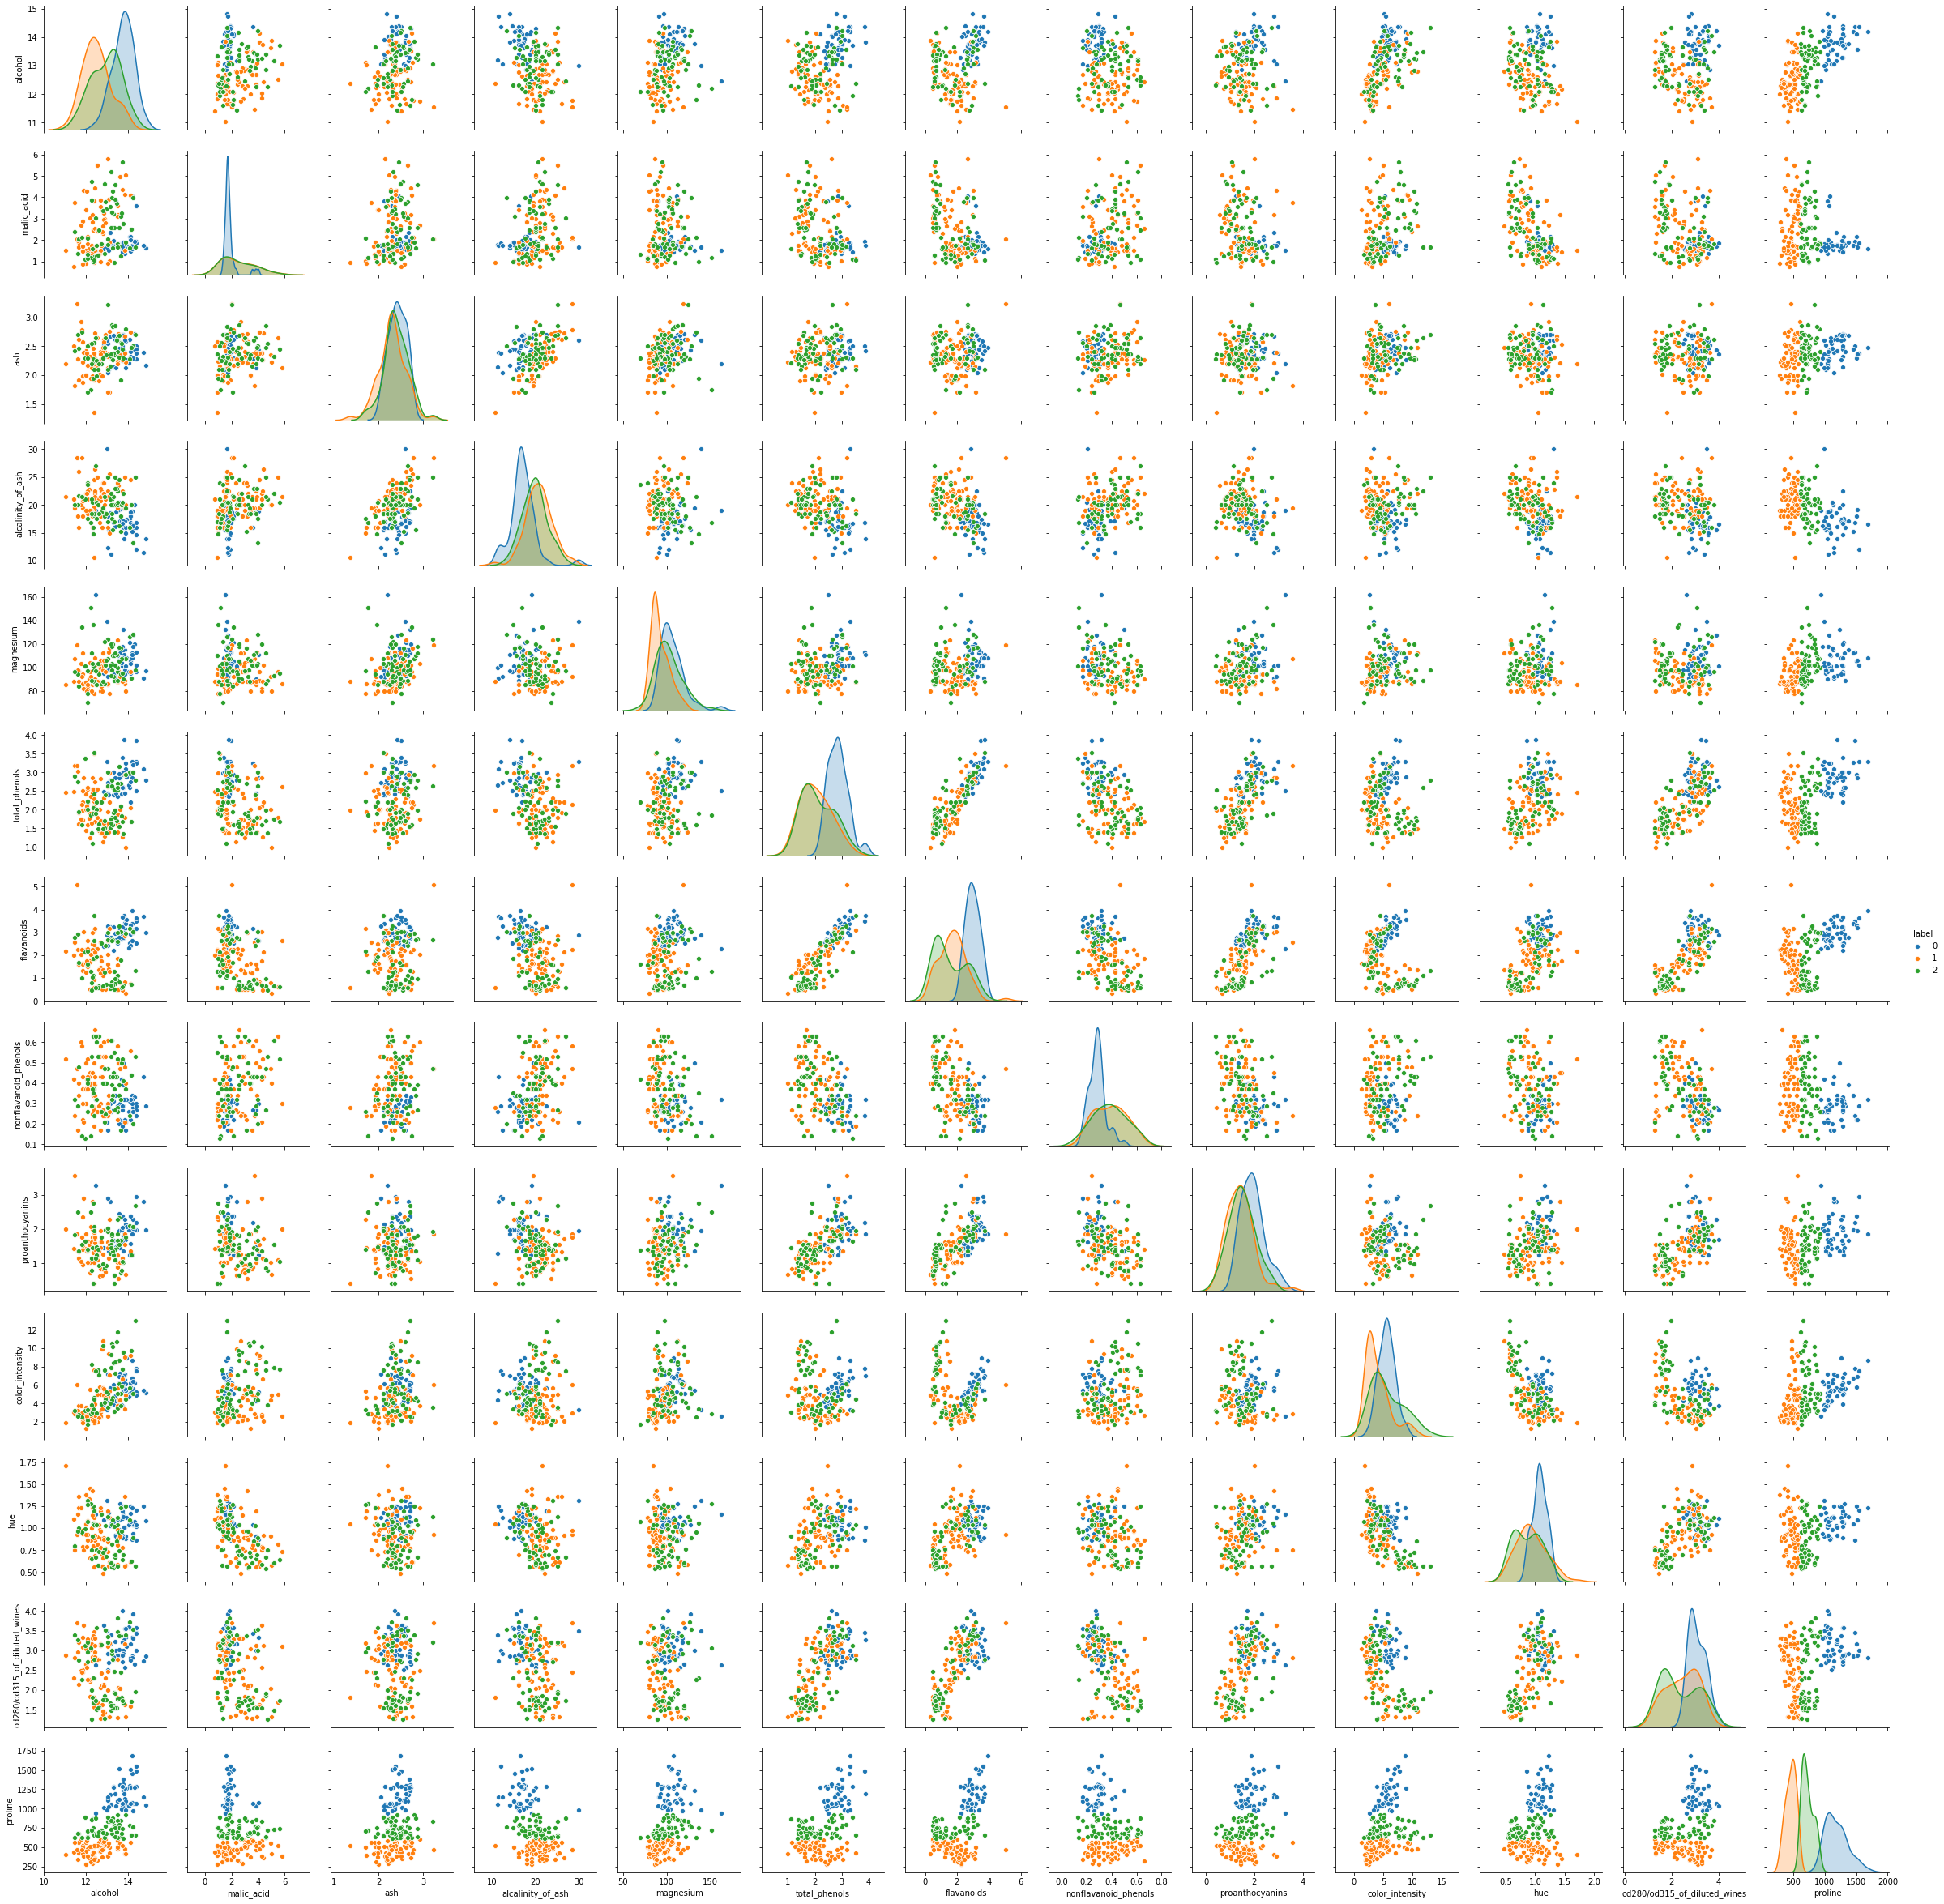

In [12]:
sns.pairplot(wine_label, hue='label')
plt.plot()